<a href="https://colab.research.google.com/github/Patroock/Trabalho_algoritmo_classificacao/blob/main/Algoritimo_de_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.patches import Patch

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [38]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
palette = sns.color_palette('Set2')
palette

In [41]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Algoritmo de Classificacao/MALratings.csv')
print(f'The dataset has {len(df)} rows and {df.shape[1]} columns')
df.head()

The dataset has 20343 rows and 8 columns


,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare,"Action,Comedy,Sci-Fi",19,939,8.93,1,1 hr. 50 min.,NaN
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017
4,Koe no Katachi,NaN,15,19,8.96,1,2 hr. 10 min.,NaN


In [42]:
df.isna().sum()

Title                 0
Genres            10327
Rank                  0
Popularity            0
Score              6324
Episodes              0
Episode length        0
Release Date      15256
dtype: int64

In [43]:
df['Anime Type'] = df['Episode length'].apply(lambda x: 'TV' if ' ep.' in x else 'Movies')
df['Season'] = df['Release Date'].fillna('').apply(lambda x: x.split()[0] if x != '' else '-')
df['Year'] = df['Release Date'].fillna('').apply(lambda x: x.split()[-1] if x != '' else '-')
df.head()

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date,Anime Type,Season,Year
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022,TV,Spring,2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017,TV,Fall,2017
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare,"Action,Comedy,Sci-Fi",19,939,8.93,1,1 hr. 50 min.,NaN,Movies,-,-
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017,TV,Winter,2017
4,Koe no Katachi,NaN,15,19,8.96,1,2 hr. 10 min.,NaN,Movies,-,-


In [44]:
tv = df.query('`Anime Type` == "TV"')
tv.shape

(10142, 11)

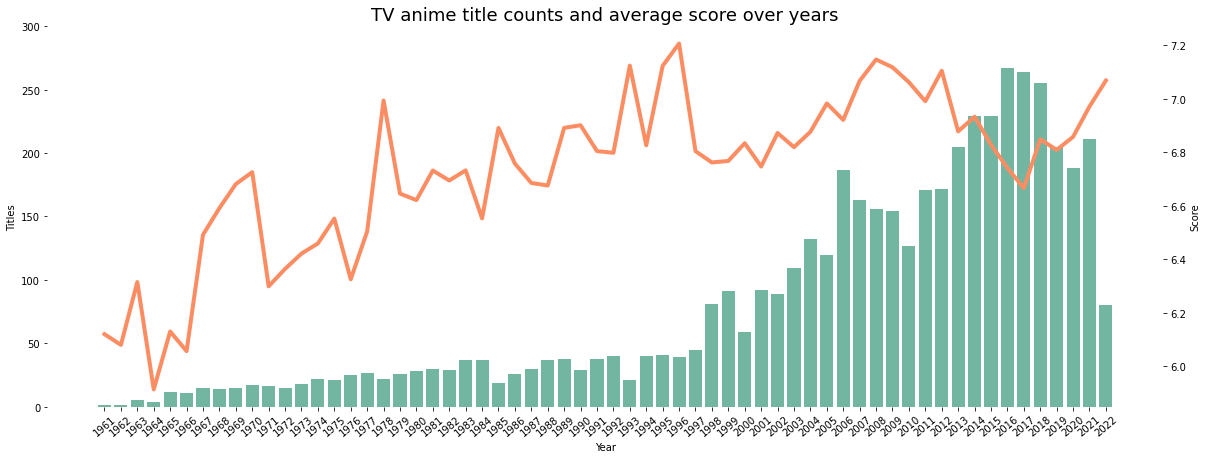

In [45]:
data = tv.query('Year != "-"')
data = data.groupby('Year').agg(**{
    'Titles': ('Title', 'count'),
    'Score': ('Score', 'mean')
})

plt.figure(figsize=(20, 7))
plt.box(False)

ax_1 = sns.barplot(x=data.index, y=data['Titles'], color=palette[0])
ax_1.set_xticklabels(labels=data.index.tolist(), rotation=40)
ax_1.set_ylim([0, 300])

ax_2 = ax_1.twinx()
sns.lineplot(x=data.index, y=data['Score'], ax=ax_2, color=palette[1], linewidth=4)
ax_2.set_frame_on(False)

plt.title('TV anime title counts and average score over years', fontsize=18)
plt.show()

In [46]:
data = tv.query('Season != "-"')
data = data.groupby('Season').agg(**{
    'Titles': ('Title', 'count'),
    'Score': ('Score', 'mean')
})
data

,Titles,Score
Season,,
Fall,1443,6.907603
Spring,1645,6.895985
Summer,841,6.830256
Winter,998,6.816874
